<a href="https://colab.research.google.com/github/patilparas/Market-Analysis-PCA-/blob/master/pca_market_basket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd

In [0]:
orders = pd.read_csv('orders.csv')
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [0]:
od = orders.sort_values(by = 'order_id')

In [0]:
od

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
1868044,1,112108,train,4,4,10,9.0
3355525,2,202279,prior,3,5,9,8.0
3417191,3,205970,prior,16,5,17,12.0
2958007,4,178520,prior,36,1,9,7.0
2593373,5,156122,prior,42,6,16,9.0
...,...,...,...,...,...,...,...
1809968,3421079,108687,prior,6,1,13,0.0
877324,3421080,52726,prior,2,1,11,2.0
1949724,3421081,117076,prior,1,3,11,NaN
2903252,3421082,175185,prior,23,2,18,4.0


In [0]:
prior = pd.read_csv('order_products__prior.csv')
prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1.0,1.0
1,2,28985,2.0,1.0
2,2,9327,3.0,0.0
3,2,45918,4.0,1.0
4,2,30035,5.0,0.0


In [0]:
prior.shape

(22845951, 4)

In [0]:
train = pd.read_csv('order_products__train.csv')
train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [0]:
order_prior = pd.merge(prior,orders,on=['order_id','order_id'])

In [0]:
order_prior = order_prior.sort_values(by=['user_id','order_id'])
order_prior.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
4089398,431534,196,1.0,1.0,1,prior,5,4,15,28.0
4089399,431534,12427,2.0,1.0,1,prior,5,4,15,28.0
4089400,431534,10258,3.0,1.0,1,prior,5,4,15,28.0
4089401,431534,25133,4.0,1.0,1,prior,5,4,15,28.0
4089402,431534,10326,5.0,0.0,1,prior,5,4,15,28.0


In [0]:
products = pd.read_csv('products.csv')
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [0]:
products.count()

product_id       49688
product_name     49688
aisle_id         49688
department_id    49688
dtype: int64

In [0]:
aisles = pd.read_csv('aisles.csv')
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [0]:
_mt = pd.merge(prior,products, on = ['product_id','product_id'])
_mt = pd.merge(_mt,orders,on=['order_id','order_id'])
mt = pd.merge(_mt,aisles,on=['aisle_id','aisle_id'])
mt.head(10)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle
0,2,33120,1.0,1.0,Organic Egg Whites,86,16,202279,prior,3,5,9,8.0,eggs
1,26,33120,5.0,0.0,Organic Egg Whites,86,16,153404,prior,2,0,16,7.0,eggs
2,120,33120,13.0,0.0,Organic Egg Whites,86,16,23750,prior,11,6,8,10.0,eggs
3,327,33120,5.0,1.0,Organic Egg Whites,86,16,58707,prior,21,6,9,8.0,eggs
4,390,33120,28.0,1.0,Organic Egg Whites,86,16,166654,prior,48,0,12,9.0,eggs
5,537,33120,2.0,1.0,Organic Egg Whites,86,16,180135,prior,15,2,8,3.0,eggs
6,582,33120,7.0,1.0,Organic Egg Whites,86,16,193223,prior,6,2,19,10.0,eggs
7,608,33120,5.0,1.0,Organic Egg Whites,86,16,91030,prior,11,3,21,12.0,eggs
8,623,33120,1.0,1.0,Organic Egg Whites,86,16,37804,prior,63,3,12,3.0,eggs
9,689,33120,4.0,1.0,Organic Egg Whites,86,16,108932,prior,16,1,13,3.0,eggs


In [0]:
mt.shape

(22845951, 14)

In [0]:
mt.columns

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered',
       'product_name', 'aisle_id', 'department_id', 'user_id', 'eval_set',
       'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'aisle'],
      dtype='object')

In [0]:
mt['product_name'].count()

22845951

In [0]:
len(mt['product_name'].unique())

49573

In [0]:
prior.shape

(22845951, 4)

In [0]:
len(mt['aisle'].unique())

134

In [0]:
mt['aisle'].value_counts()[0:10]

fresh fruits                     2566868
fresh vegetables                 2406341
packaged vegetables fruits       1243231
yogurt                           1022474
packaged cheese                   690518
milk                              628193
water seltzer sparkling water     592686
chips pretzels                    509193
soy lactosefree                   449895
bread                             412177
Name: aisle, dtype: int64

In [0]:
cust_prod = pd.crosstab(mt['user_id'], mt['aisle'])
cust_prod.head(10)

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,body lotions soap,bread,breakfast bakery,breakfast bars pastries,bulk dried fruits vegetables,bulk grains rice dried goods,buns rolls,butter,candy chocolate,canned fruit applesauce,canned jarred vegetables,canned meals beans,canned meat seafood,cat food care,cereal,chips pretzels,cleaning products,cocoa drink mixes,coffee,cold flu allergy,condiments,cookies cakes,crackers,cream,deodorants,diapers wipes,digestion,dish detergents,dog food care,doughs gelatins bake mixes,...,packaged meat,packaged poultry,packaged produce,packaged seafood,packaged vegetables fruits,paper goods,pasta sauce,pickled goods olives,plates bowls cups flatware,popcorn jerky,poultry counter,prepared meals,prepared soups salads,preserved dips spreads,protein meal replacements,red wines,refrigerated,refrigerated pudding desserts,salad dressing toppings,seafood counter,shave needs,skin care,soap,soft drinks,soup broth bouillon,soy lactosefree,specialty cheeses,specialty wines champagnes,spices seasonings,spirits,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,3,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,8,0,0,0,0,4,0,10,0,0,0,0,0,0,0,...,0,1,0,0,3,0,0,1,0,7,0,0,1,0,0,0,4,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,33
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,...,0,0,0,0,8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,0,0,0,0,3,1,0,0,0,0,0,2,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,1,0,2,0,1,0,0,0,0,0,0,15,0,1,0,3,0,0,0,0,0,0,0,...,0,0,0,0,7,0,0,0,0,2,0,1,0,0,0,0,18,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,3
8,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,6,0,2,0,0,0,0,2,1,0,0,0,0,0,0,1,0,0,0,0,2,6,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,4,0,2,0,0,2,0,0,0,0,0,0,0,0,1,0,14


In [0]:
cust_prod.shape

(205378, 134)

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca.fit(cust_prod)
pca_samples = pca.transform(cust_prod)

In [0]:
ps = pd.DataFrame(pca_samples)
ps.head()

,0,1,2,3,4,5
0,-16.673638,1.409657,-3.248490,0.798382,0.023783,-0.524242
1,6.982416,28.772396,7.591858,11.391744,-4.834567,-1.500905
2,-6.934332,2.026996,-7.664014,0.524120,-0.734325,-0.719374
3,-19.625063,-0.621732,-1.808357,2.275745,-0.131910,0.543721
4,-14.578352,-0.927146,-0.231647,2.265603,0.614091,-1.741214


(205378, 2)
          4          1
0  0.023783   1.409657
1 -4.834567  28.772396
2 -0.734325   2.026996
3 -0.131910  -0.621732
4  0.614091  -0.927146


/usr/local/lib/python3.6/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


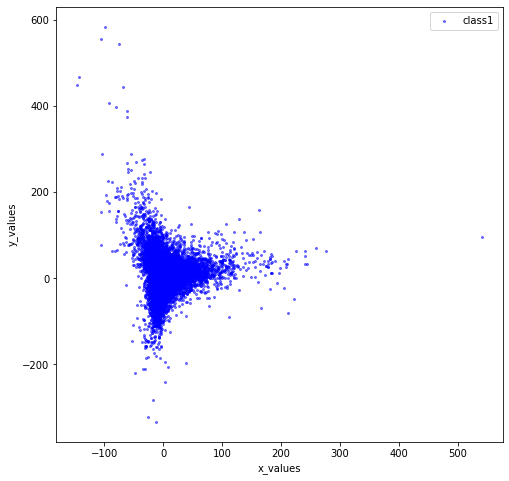

In [0]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
tocluster = pd.DataFrame(ps[[4,1]])
print (tocluster.shape)
print (tocluster.head())

fig = plt.figure(figsize=(8,8))
plt.plot(tocluster[4], tocluster[1], 'o', markersize=2, color='blue', alpha=0.5, label='class1')

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.show()

In [0]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

clusterer = KMeans(n_clusters=4,random_state=42).fit(tocluster)
centers = clusterer.cluster_centers_
c_preds = clusterer.predict(tocluster)
print(centers)

[[ -7.6306238   45.7436574 ]
 [ -0.0727819    0.07932625]
 [ 59.51391395  19.2123469 ]
 [ -3.22408354 -29.09758419]]


['blue', 'orange', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'green']


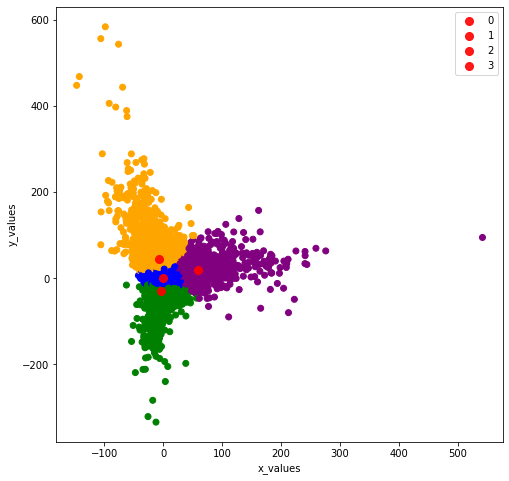

In [0]:
import matplotlib
fig = plt.figure(figsize=(8,8))
colors = ['orange','blue','purple','green']
colored = [colors[k] for k in c_preds]
print (colored[0:10])
plt.scatter(tocluster[4],tocluster[1],  color = colored)
for ci,c in enumerate(centers):
    plt.plot(c[0], c[1], 'o', markersize=8, color='red', alpha=0.9, label=''+str(ci))

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.show()